#  Computational Statistics, class 2 homework
Studet: Giovanni Guarnieri Soares

Professor: Leonardo Bacelar Lima Santos

This work is divided in three parts, the first one is generating random numbers with and without a seed, with *numpy* rng and *random* number generator.

In the second part we are going to explore different types of distribution to each generator, and see its difference when making the numbers, by plotting and fitting those numbers.

In the third part we present a geometric representation of some statistical tools, like *min*, *max*, *average*, *mode*, *range*, *sum*, *variance*, *standard deviation*.



## Lecture video

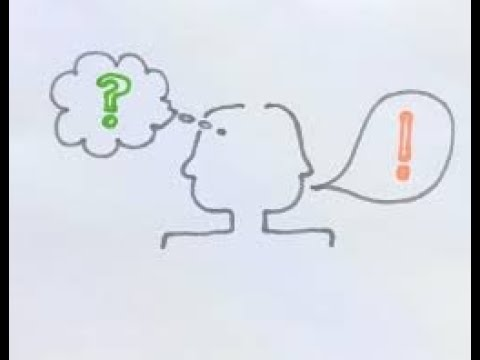

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('plPBGsnEnc8')

## Importing some necessary modules.

In [ ]:
import random as rnd # The random number generator module
import numpy as np # random number generator module and some other tools
import plotly.express as px # plotting module
import plotly.graph_objects as go # plotting module
import statistics # built-in statistics module
import math # mathematics built-in module
import sys
import pandas as pd
print("User Current Version:-", sys.version) # Checking system version

User Current Version:- 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]


## First part: Generating Random numbers in two different modules

There are plenty of ways to generate random numbers. We can generate only integers, or floats.  The *normal* and *bell* distributions are very commonly used, specially in physics, so we are going to explore both of them.

In [ ]:
# The normal distribution
print(f"First, without a seed we would get to the random module: {rnd.random()}")
print(f"and to the numpy module: {np.random.uniform()}")

First, without a seed we would get to the random module: 0.492326223322452
and to the numpy module: 0.7010630667349832


Both cases we have a float value being generated in an uniform distribution.

The *rnd.random()* generator has a 53-bit precision floats and a period of $2^{19937}-1$. While the *np.random.uniform()* produce doubles, and unsigned 32 and 64-bit integers and has a period of $2^{128}$.

In [ ]:
print(f"The np module can generate an array of random numbers simply: {np.random.sample(10)}")
print(f"while the rnd module is useful to pick random elements in a set: \
{rnd.sample(set(np.arange(1000)), k=2)} choosing two from 0 to 1000" )

The np module can generate an array of random numbers simply: [0.67068088 0.17328349 0.81612527 0.71778442 0.96381529 0.17653508
 0.37882387 0.00805073 0.00897734 0.44065138]
while the rnd module is useful to pick random elements in a set: [738, 31] choosing two from 0 to 1000


To use seeds in both of them we just need to set it with a command.

In [ ]:
rnd.seed(8666)
np.random.seed(8666)

print(f"The rnd module with a seed: {rnd.random()}")
print(f"The np module with a seed: {np.random.uniform()}")

The rnd module with a seed: 0.6785755456435478
The np module with a seed: 0.45030013673289304


To test if the seed is working we repeat the prints and reset the seed:

In [ ]:
rnd.seed(8666)
np.random.seed(8666)

print(f"The rnd module with a seed: {rnd.random()}")
print(f"The np module with a seed: {np.random.uniform()}")

The rnd module with a seed: 0.6785755456435478
The np module with a seed: 0.45030013673289304


We get the same values again, and if we don't reset the seed:

In [ ]:
print(f"The rnd module with a seed: {rnd.random()}")
print(f"The np module with a seed: {np.random.uniform()}")

The rnd module with a seed: 0.2991170569881655
The np module with a seed: 0.3052021363498665


The values change.

## Second part: Different types of generators and distributions

In this part we are exploring the different types of generators and distributions, showing the uniform and Gaussian distribution in a histogram. We also show the descriptive statistics to each case, calculating the *min*, *max*, *average*, *median*, *range*, *variance* and *standard deviation*.


In [ ]:
def plot_distribution(data, 
                      title = None, 
                      density = None, 
                      extra = None, 
                      extra_name = None, 
                      extra2 = None, 
                      extra2_name = None): # histogram plotting function
  counts, bins = np.histogram(data, 
                              bins=50, 
                              range=(min(data),max(data)), 
                              density = density) # making the bins
  bins = 0.5 * (bins[:-1] + bins[1:]) # making the bins stay in the middle
  fig = px.bar(x=bins, 
               y=counts, 
               labels={'x':'RNG', 'y':'count'}, 
               title = title,
               width=1200, height=600) # plotting
  if extra != None:
    fig.add_trace(go.Scatter(x=[extra,extra], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='firebrick', width=2, dash='dash'),
                         name=extra_name))
  if extra2 != None:
    fig.add_trace(go.Scatter(x=[extra+extra2,extra+extra2], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash'),
                         name=extra2_name))
    fig.add_trace(go.Scatter(x=[extra-extra2,extra-extra2], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash'),
                         name=extra2_name,
                         showlegend=False))


  fig.update_layout(
      font=dict(
          family="Courier New, monospace",
          size=22,
          color="Black"
      )
  )
  return fig

numbers = int(1e5) # amount of generated numbers

### Uniform

In [ ]:
rnd.seed(8666) # fixing both seeds
np.random.seed(8666)

In [ ]:
data_np = np.random.sample(numbers) # generate a sample of random numbers
print(f"Numpy RNG: \
Median: {np.median(data_np)}, range: {np.max(data_np)-np.min(data_np)}, \
sum: {np.sum(data_np)}, min: {np.min(data_np)}, max: {np.max(data_np)}, \
mean: {np.mean(data_np)}, variance: {np.var(data_np)}, StDev: {np.std(data_np)}.") # displaying the Descriptive Statistics

# checking if the results of variance and stddev makes sense
print(f"Is std dev the square root of variance? {math.isclose(np.sqrt(np.var(data_np)), np.std(data_np))}") 

Numpy RNG: Median: 0.5014247777395646, range: 0.9999854122870294, sum: 50070.7318463151, min: 1.1396126382789973e-05, max: 0.9999968084134122, mean: 0.500707318463151, variance: 0.08336483362869213, StDev: 0.28872968955182304.
Is std dev the square root of variance? True


In [ ]:
# the process is repeated to another generator

data_rnd = [rnd.random() for i in range(numbers)]
print(f"Rnd RNG: \
Median: {np.median(data_rnd)}, range: {np.max(data_rnd)-np.min(data_rnd)}, \
sum: {np.sum(data_rnd)}, min: {np.min(data_rnd)}, max: {np.max(data_rnd)}, \
mean: {np.mean(data_rnd)}, variance: {np.var(data_rnd)}, StDev: {np.std(data_rnd)}.")

print(f"Is std dev the square root of variance? {math.isclose(np.sqrt(np.var(data_rnd)), np.std(data_rnd))}")

Rnd RNG: Median: 0.5001235293845674, range: 0.9999856113945886, sum: 50091.99205657264, min: 1.1179171982567127e-06, max: 0.9999867293117869, mean: 0.5009199205657264, variance: 0.08308477680429703, StDev: 0.28824430055821926.
Is std dev the square root of variance? True


In [ ]:
plot_distribution(data_np, "Numpy RNG uniform distribution", extra = np.mean(data_np), extra_name = "Mean").show()

In [ ]:
plot_distribution(data_rnd, "Rnd RNG uniform distribution", extra = np.mean(data_rnd), extra_name = "Mean").show()

As expected, they are both very similar. We generated 100000 random numbers in a [0,1) interval and plotted their distribution using 50 bins in total.

Now we will explore different distributions, using the same methodology.

### Gauss

In [ ]:
rnd.seed(8666)
np.random.seed(8666)


In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
data_np = np.random.normal(mu, sigma, numbers)
print(f"Numpy RNG: \
Median: {np.median(data_np)}, range: {np.max(data_np)-np.min(data_np)}, \
sum: {np.sum(data_np)}, min: {np.min(data_np)}, max: {np.max(data_np)}, \
mean: {np.mean(data_np)}, variance: {np.var(data_np)}, StDev: {np.std(data_np)}.")

print(f"Is std dev the square root of variance? {math.isclose(np.sqrt(np.var(data_np)), np.std(data_np))}")

Numpy RNG: Median: 0.0002739124971535939, range: 0.8288676542341797, sum: -10.544405910256836, min: -0.42155336196863474, max: 0.407314292265545, mean: -0.00010544405910256837, variance: 0.009952911706862274, StDev: 0.09976428071640808.
Is std dev the square root of variance? True


In [ ]:
mu, sigma = 3, 0.05 # mean and standard deviation
data_rnd = [rnd.gauss(mu, sigma) for i in range(numbers)]
print(f"Rnd RNG: \
Median: {np.median(data_rnd)}, range: {np.max(data_rnd)-np.min(data_rnd)}, \
sum: {np.sum(data_rnd)}, min: {np.min(data_rnd)}, max: {np.max(data_rnd)}, \
mean: {np.mean(data_rnd)}, variance: {np.var(data_rnd)}, StDev: {np.std(data_rnd)}.")

print(f"Is std dev the square root of variance? {math.isclose(np.sqrt(np.var(data_rnd)), np.std(data_rnd))}")

Rnd RNG: Median: 2.9998535657933982, range: 0.43848429134481615, sum: 299992.6830658304, min: 2.765014867808605, max: 3.203499159153421, mean: 2.999926830658304, variance: 0.002504180064519924, StDev: 0.05004178318685221.
Is std dev the square root of variance? True


and their distributions

In [ ]:
plot_distribution(data_np, 
                  "Numpy RNG Gaussian distribution", 
                  extra = np.mean(data_np), 
                  extra_name = "Mean",
                  extra2 = np.std(data_np),
                  extra2_name = "Std. Dev.").show()

In [ ]:
plot_distribution(data_rnd, 
                  "Numpy RNG Gaussian distribution", 
                  extra = np.mean(data_rnd), 
                  extra_name = "Mean",
                  extra2 = np.std(data_rnd),
                  extra2_name = "Std. Dev.").show()

### Triangular

In [ ]:
rnd.seed(8666)
np.random.seed(8666)

In [ ]:
left, mode, right = -1, 0, 1 # the minimum value, the mode and the maximun value
data_np = np.random.triangular(left, mode, right, numbers)
print(f"Numpy RNG: \
Median: {np.median(data_np)}, range: {np.max(data_np)-np.min(data_np)}, \
sum: {np.sum(data_np)}, min: {np.min(data_np)}, max: {np.max(data_np)}, \
mean: {np.mean(data_np)}, variance: {np.var(data_np)}, StDev: {np.std(data_np)}.")

print(f"Is std dev the square root of variance? {math.isclose(np.sqrt(np.var(data_np)), np.std(data_np))}")

Numpy RNG: Median: 0.0014257941846805844, range: 1.9926993825081518, sum: 98.59612407214368, min: -0.9952258767542532, max: 0.9974735057538986, mean: 0.0009859612407214367, variance: 0.16646305858536328, StDev: 0.4079988463039611.
Is std dev the square root of variance? True


In [ ]:
left, mode, right = -3, 0, 1 # the minimum value, the mode and the maximun value
data_rnd = [rnd.triangular(left, right, mode) for i in range(numbers)]
print(f"Rnd RNG: \
Median: {np.median(data_rnd)}, range: {np.max(data_rnd)-np.min(data_rnd)}, \
sum: {np.sum(data_rnd)}, min: {np.min(data_rnd)}, max: {np.max(data_rnd)}, \
mean: {np.mean(data_rnd)}, variance: {np.var(data_rnd)}, StDev: {np.std(data_rnd)}.")

print(f"Is std dev the square root of variance? {math.isclose(np.sqrt(np.var(data_rnd)), np.std(data_rnd))}")

Rnd RNG: Median: -0.5460443345372714, range: 3.9838097018247893, sum: -66242.21255421874, min: -2.9882400997836456, max: 0.9955696020411439, mean: -0.6624221255421874, variance: 0.7230696958295066, StDev: 0.8503350491597454.
Is std dev the square root of variance? True


In [ ]:
plot_distribution(data_np, "Numpy RNG Triangular distribution", extra = np.mean(data_np), extra_name = "Mean").show()

In [ ]:
plot_distribution(data_rnd, "Rnd RNG Triangular distribution", extra = np.mean(data_rnd), extra_name = "Mean").show()

### Conclusion
The interesting part about the different RNGs are the cases where we use them. When we need equal probabilities to every outcome, we use an Uniform distribution. When whe need it to oscilate around a mean value, we use the Gaussian distribution, and when we need a more frequent value to appear or a distribution that is not symmetric, the Triangular distribution comes as handy. 

The period of both random numbers generatos are distinct, but did not affect in the result in any way whatsoever.

We tried to calculate the mode to each model, but the numbers generated were way too close. Most of the times there was two or more most frequent numbers, so there was no "mode".



### Percentiles

#### Plotting Function

This function calculates the population inside *counts* in a iterative way, where we start at the first value and iterate over all values until we find the percentiles needed.

$$\frac{\sum_{n=0}^{n} counts(n)}{\sum_{n=0}^{N} counts(n)} = \%$$

where $N$ is the size of counts, $n$ our iterator, and \% our percentile.

This way, we can find the point $n$ related to the percentile we need, by iterating the value of $n$ until we find it.

In [ ]:
def plot_percentiles(data, percentiles, colors, title = None, amount = 1000, tol = 0.5):
  counts, bins = np.histogram(data,
                              bins=amount, 
                              range=(min(data),max(data)), 
                              density = True) # making the bins
  bins = 0.5 * (bins[:-1] + bins[1:]) # making the bins stay in the middle
  j=0
  pos = []
  for i in range(amount):
    if math.isclose(sum(counts[:i])/sum(counts)*100, percentiles[j], abs_tol = tol ) and j < 5:
      pos.append(i)
      j+=1


  k=0
  fig = px.bar(x=bins, 
                y=counts, 
                labels={'x':'RNG', 'y':'count'}, 
                title = title,
                width=1200, height=600) # plotting
  for i in pos:
    fig.add_trace(go.Scatter(x=[bins[i],bins[i]],
                          y=[0,max(counts)], 
                          mode='lines', 
                          line=dict(color=colors[k], width=2, dash='dash'),
                          name=f"Percentile: {percentiles[k]}%, x = {bins[i]:.2f}"))
    k+=1

  fig.update_layout(
      font=dict(
          family="Courier New, monospace",
          size=22,
          color="Black"
      )
  )
  return fig


#### Plots

In [ ]:
np.random.seed(8666)
data = np.sort(np.random.sample(numbers))

percentiles = [10, 25, 50, 75, 90, 99]
colors = ["black", "firebrick", "firebrick", "black", "orange"]
title = "RNG Uniform Percentiles"

plot_percentiles(data, percentiles, colors, title)

As expected the values of x is the same as the value in the percentile.

In [ ]:
np.random.seed(8666)

mu, sigma = 0, 0.2 # mean and standard deviation
data = np.sort(np.random.normal(mu, sigma, numbers))

percentiles = [2.1, 15.8, 50, 84.1, 97.7, 100]
colors = ["black", "firebrick", "orange", "firebrick", "black"]
title = "RNG Gaussian Percentiles"

plot_percentiles(data, percentiles, colors, title)

In here we can see that the population percentiles are similar to the three sigma rule.

In [ ]:
data = np.sort(np.random.triangular(-3, 0, 3, numbers))

percentiles = [10, 25, 50, 75, 90, 100]
colors = ["black", "firebrick","orange", "firebrick", "black" ]
title = "RNG Triangular Percentiles"

plot_percentiles(data, percentiles, colors, title)

The triangular and Gaussian distribution represents the same symmetry, as expected.

In [ ]:
data = np.sort(np.random.triangular(-90, -70, 3, numbers))

percentiles = [10, 25, 50, 75, 90, 100]
colors = ["black", "firebrick","orange", "firebrick", "black" ]
title = "RNG Triangular Percentiles"

plot_percentiles(data, percentiles, colors, title)

when the mode is not the middle point, the symmetry breaks.

In [ ]:
data = np.sort(np.random.power(5, numbers))

percentiles = [10, 25, 50, 75, 90, 100]
colors = ["black", "firebrick","orange", "firebrick", "black" ]

title = "RNG Power Function Percentiles"

plot_percentiles(data, percentiles, colors, title)

while the power function has most of its population in the right-end of the graph.

## Third part: Visualization


### Moving Average

In [ ]:
numbers = int(100)
def moving_average(data, avg = 10):
  avg = int(avg)
  new_list = []
  for i in range(avg, numbers):
    new_list.append(np.mean(data[i:i+avg]))
    
  return new_list

In [ ]:
data = np.random.sample(numbers) # generate a sample of random numbers


mv_avg_middle = moving_average(data)
mv_avg_right = moving_average(data)

fig = px.scatter(x=range(len(data)), 
              y=data,
              title = "",
              width=1200, height=600,
              labels={'x':'number', 'y':'data'})
fig.add_trace(go.Scatter(x=np.arange(0,len(mv_avg_middle))+10, y=mv_avg_middle, name = "Mvg avg centered",
                         line=dict(color='firebrick'))) # dash options include 'dash', 'dot', and 'dashdot'
fig.add_trace(go.Scatter(x=np.arange(0,len(mv_avg_right))+10, y=mv_avg_right, name = "Mvg avg right",
                         line=dict(color='firebrick'))) # dash options include 'dash', 'dot', and 'dashdot'
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    )
)
fig.show()

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
data = np.random.normal(mu, sigma, numbers)
mv_avg = moving_average(data, avg = 8)
fig = px.scatter(x=range(len(data)), 
              y=data,
              title = "",
              width=1200, height=600,
              labels={'x':'number', 'y':'data'})
fig.add_trace(go.Scatter(x=np.arange(0,len(mv_avg))+10, y=mv_avg, name = "Mvg avg",
                         line=dict(color='firebrick'))) # dash options include 'dash', 'dot', and 'dashdot'
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    )
)
fig.show()

## Fourth part: Optional


### Subsets

First we need to see if the mean of a set can be calculated with just a subset of that set.

To do that, we generate a random uniform sample of numbers, calculating its mean. Then, we divide it in smaller subsets with the same size, meaning that if a set of $10^5$ samples may have $10$ subsets each with $10^4$ numbers. Then, we calculate the mean of each subset and compare.

To compare, we will use the biggest means percentage error:

$$ \%error = \frac{|subset\_means - set\_mean|}{set\_mean} * 100$$

and the *Standard Deviation*.

In [ ]:
np.random.seed(8666)
numbers = int(1e5)
set1 = np.random.sample(numbers)
subsets = []
means = []
quantity = 10
for i in range(quantity):
  subsets.append(set1[int(i*numbers/quantity):int((i+1)*numbers/quantity)])
  means.append(np.mean(subsets[i]))
entire_mean = np.mean(set1)
print(f"Entire set mean: {entire_mean}")  
print(f"All subsets means: {means}")
print(f"Max percentage error: {max(abs(means-entire_mean)*100/entire_mean):.2f}%")
print(f"Means of subsets means: {np.mean(means)}")
print(f"Standard deviation of means: {np.std(means)}")

Entire set mean: 0.500707318463151
All subsets means: [0.5055843999598635, 0.4970266394664085, 0.5027616589770404, 0.498964777875209, 0.4997312935893653, 0.5014323169385764, 0.5025869780768567, 0.4993556412474847, 0.4977067882883562, 0.5019226902123495]
Max percentage error: 0.97%
Means of subsets means: 0.500707318463151
Standard deviation of means: 0.0024881477683457286


Here we can see that there is a little difference between the means, and a max percentage error of 0.97%, which is not too much. But, we used a big sample of $10^5$, so we still need to test it with a samller one. So, we made a new sample with $100$ numbers. The standard deviation of means is about small when compared with the mean, as desired.

In [ ]:
np.random.seed(8666)
numbers = int(1e2)
set1 = np.random.sample(numbers)
subsets = []
means = []
quantity = 10
for i in range(quantity):
  subsets.append(set1[int(i*numbers/quantity):int((i+1)*numbers/quantity)])
  means.append(np.mean(subsets[i]))
entire_mean = np.mean(set1)
print(f"Entire set mean: {entire_mean}")  
print(f"All subsets means: {means}")
print(f"Max percentage error: {max(abs(means-entire_mean)*100/entire_mean):.2f}%")
print(f"Means of subsets means: {np.mean(means)}")
print(f"Standard deviation of means: {np.std(means)}")

Entire set mean: 0.49232023411955056
All subsets means: [0.5176136181304124, 0.5280599683019505, 0.43448341849256966, 0.5635364013937394, 0.5186333609680285, 0.45995675472716063, 0.5708935494823262, 0.39586131893551524, 0.6912385465254316, 0.24292540423837017]
Max percentage error: 50.66%
Means of subsets means: 0.49232023411955045
Standard deviation of means: 0.11371810033042919


The max percentage error was more significant, about 50%, but it fluctuates a lot if we change the seed. Nonetheless, it is a big increase from the 0.97%. The *Standard Deviation* reaches the same magnitude as the set *mean*, meaning that there is a bigger variance in the subset means. 

This way, we plot in a graph the behaviour of subsets, exploring the size of subsets (in consequence the amount as well) 

In [ ]:
numbers = [1e2, 1e3, 1e4, 1e5, 1e6, 1.5e8]
fig = go.Figure()
for quantity in [10, 20, 50, 100, 7500]:
  stddev_means = []
  for j in numbers:
    set1 = np.random.sample(int(j))
    subsets = []
    means = []
    for i in range(quantity):
      subsets.append(set1[int(i*j/quantity):int((i+1)*j/quantity)])
      means.append(np.mean(subsets[i]))
    stddev_means.append(np.std(means))
  
  fig.add_trace(go.Scatter(x=numbers, 
                y=stddev_means, name = f"{quantity}"))
fig.update_layout(title_text="The variation of the Standard Deviation over the amount of subsets and samples",
                  legend_title="Size of subsets",
                  xaxis_title="log(Samples)",
                  yaxis_title="Std. Dev",)
fig.update_xaxes(type="log")

fig.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



**Conclusion**

Here we can see that the amount of subsets is impactful in the final result, and when we reach $1M$ samples there is little difference, because the amount of subsets is too small compared to the amount of samples and each subset is already too big.

The first 100-curve point in the curve is dividing a 100 sample set in 100 subsets, meaning that there is 1 number in each subset, hence why the big standard deviation. And the first 10k-curve point only appears when there is a sample big enough to divide.

In conclusion, if there is about 1M samples, a subset with size 1000 represents well in the result, when exploring an uniform distribution.

The IBOPE institute does market research in Brazil studying the most viewed TV channels by spreading a dvice called DIB. In 12/2019 there were $6060$ devices in people's home monitorating about $20k$ individuals. This combined with a forms where the person answers what they were watching at what times makes the audience index [[1](https://economia.uol.com.br/noticias/redacao/2019/12/06/como-sao-os-aparelhos-de-medicao-de-audiencia-do-ibope.htm)].

About 97% of people who was asked still watches television [[2](https://gente.globo.com/a-midia-eu-audiencia/)]. Those people have access to the internet, and 7 out of 10 brazilians has access, making $240M \times 0.7 \times 0.97 = 143M$.  This way, a subset of $20k$ people is enough to reach a low standard deviation. This is a similar case as the 7.5k-curve, since dividing the 150M sample in 7.5k subsets will result in subsets with size 20k.

### Calculating $\pi$ with random numbers

To calculate $\pi$ with random numbers we will use the Monte Carlo Integration method. This method explores the idea of checking the percentage of random points inside the quarter of a circle. After that we multiply the quarter by $4$ and obtain the approximate value of $pi$.

In [ ]:
np.random.seed(8666) # Setting the seed
numbers = int(1e3) # The amount of numbers to calculate
point = (np.random.sample(numbers), np.random.sample(numbers)) # generate a sample of random points
pi = 0 # List to count how many points are inside the function
inside = np.zeros(numbers)
for i in range(numbers):
  if point[0][i]**2+point[1][i]**2 < 1:
    pi+=1
    inside[i] = 1

print(f"Value calculated: {pi/numbers*4}, Percentage error: {(abs(pi/numbers*4 - math.pi)/math.pi*100):.2f}%")


Value calculated: 3.068, Percentage error: 2.34%


3.068 is not a very good approximation, with a 2.34% error, so we increase the sample size

In [ ]:
np.random.seed(8666) # Setting the seed
numbers = int(1e7) # The amount of numbers to calculate
point = (np.random.sample(numbers), np.random.sample(numbers)) # generate a sample of random points
pi = 0 # List to count how many points are inside the function
inside = np.zeros(numbers)
for i in range(numbers):
  if point[0][i]**2+point[1][i]**2 < 1:
    pi+=1
    inside[i] = 1

print(f"Value calculated: {pi/numbers*4}, Percentage error: {(abs(pi/numbers*4 - math.pi)/math.pi*100):.2f}%")


Value calculated: 3.1410836, Percentage error: 0.02%


And reach a 0.02% error

To illustrate we show how the method works

In [ ]:
fig = px.scatter(x=point[0], 
              y=point[1],
              title = "",
              width=800, height=800,
              labels={'x':'x', 'y':'y'})
fig.add_trace(go.Scatter(x=np.cos(np.arange(-math.pi,math.pi,0.1)), y=np.sin(np.arange(-math.pi,math.pi,0.1)), name = "circle",
                         line=dict(color='firebrick'))) # dash options include 'dash', 'dot', and 'dashdot'
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=22,
        color="Black"
    )
)
fig.show()

The method is not the best, takes a little while to run but in the end we got a 0.02% error and a value of $\pi \approx 3.1410$.

### My data

This data is a categorization of a graph, where we calculate some metrics and display them in a distribution.

First we show the head of the DataFrame where we store the data. 

In [ ]:
df = pd.read_csv("barabasi2k-100k_data.dat")
print(df.head())

   Node      ms      vuln  vuln_efi          betw  degree
0     0  1.8115  0.059552  0.001225   8279.167170     375
1     1  1.7955  0.062177  0.001288  10845.820120     407
2     2  1.7915  0.062959  0.001302  11440.562097     415
3     3  1.7930  0.064937  0.001272  10729.919595     412
4     4  1.7640  0.081413  0.001338  13890.540247     470


Then, we plot some of the data in a distribution and show some percentiles.

In [ ]:
percentiles = [10, 25, 50, 75, 95, 100]
colors = ["black", "firebrick","orange", "firebrick", "black" ]
title = f"Graph Degree Percentiles"

print(f"Degree Descriptive Statistics: \
Median: {np.median(df['degree'])}, range: {np.max(df['degree'])-np.min(df['degree'])}, \
sum: {np.sum(df['degree'])}, min: {np.min(df['degree'])}, max: {np.max(df['degree'])}, \
mean: {np.mean(df['degree'])}, variance: {np.var(df['degree'])}, StDev: {np.std(df['degree'])}")
plot_percentiles(df["degree"], percentiles, colors, title, tol = 1)

Degree Descriptive Statistics: Median: 71.0, range: 420, sum: 197450, min: 50, max: 470, mean: 98.725, variance: 5455.708375000112, StDev: 73.86276717670488


In [ ]:
percentiles = [10, 25, 50, 75, 95, 100]
colors = ["black", "firebrick","orange", "firebrick", "black" ]

title = "Graph Vulnerability with Efficiency Percentiles"
print(f"Vulnerability with Efficiency Descriptive Statistics: \
Median: {np.median(df['vuln_efi'])}, range: {np.max(df['vuln_efi'])-np.min(df['vuln_efi'])}, \
sum: {np.sum(df['vuln_efi'])}, min: {np.min(df['vuln_efi'])}, max: {np.max(df['vuln_efi'])}, \
mean: {np.mean(df['vuln_efi'])}, variance: {np.var(df['vuln_efi'])}, StDev: {np.std(df['vuln_efi'])}")
plot_percentiles(df["vuln_efi"], percentiles, colors, title, tol = 1)

Vulnerability with Efficiency Descriptive Statistics: Median: 0.0009917191094263, range: 0.000433722066824, sum: 2.0224519188703654, min: 0.0009429853937943, max: 0.0013767074606183, mean: 0.001011225959435183, variance: 3.7241068991105283e-09, StDev: 6.102546107249439e-05


In [ ]:
percentiles = [10, 25, 50, 75, 95, 100]
colors = ["black", "firebrick","orange", "firebrick", "black" ]

title = "Graph Vulnerability with Communicability Percentiles"
print(f"Vulnerability with Communicability Descriptive Statistics: \
Median: {np.median(df['vuln'])}, range: {np.max(df['vuln'])-np.min(df['vuln'])}, \
sum: {np.sum(df['vuln'])}, min: {np.min(df['vuln'])}, max: {np.max(df['vuln'])}, \
mean: {np.mean(df['vuln'])}, variance: {np.var(df['vuln'])}, StDev: {np.std(df['vuln'])}")
plot_percentiles(df["vuln"], percentiles, colors, title, tol = 5)

Vulnerability with Communicability Descriptive Statistics: Median: 0.0024775085271584, range: 0.0806904010625334, sum: 12.70376480057428, min: 0.0007230315333997, max: 0.0814134325959331, mean: 0.006351882400287152, variance: 0.000143001617712072, StDev: 0.011958328382849838
